## MLearn 210: Titanic Kaggle Challenge - Kei and Aditi

The Titanic challenge is a classification problem because the model has to determine if an instance falls within one of two classes - survived or did not survived.  For this assignment, we will develop a logistic regression model to be run on each observation and it will predict which class that observation belongs to.

In [1]:
# Load the training and testing data
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("train.csv")

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Data Cleaning:
Before analyzing the data, we will run a pairwise plot and and correlation matrix.  However, before we can do that, we will clean the data so that we can produce a more extensive plot and correlation matrix.
- Missing values for Age will be replaced with the mean age value.
- Sex and Embarked will be encoded to numeric values

In [2]:
import numpy as np
from sklearn import preprocessing

def printLabelEncoding(title, labels):
    print(title)
    for index, item in enumerate(labels):
        print(str(index) + ": " + item)

featuresPlot = train.copy()
print("Missing values\n", featuresPlot.isnull().sum())

# replace nan values for age with the mean value
featuresPlot["Age"] = featuresPlot.loc[:, "Age"].replace(np.nan, featuresPlot.loc[:, "Age"].mean())
featuresPlot["Embarked"] = featuresPlot.loc[:, "Embarked"].replace(np.nan, "?")

# encode string data - sex and embarked
le = preprocessing.LabelEncoder()
le.fit(featuresPlot["Sex"])
featuresPlot["Sex"] = le.transform(featuresPlot.loc[:, "Sex"].values)
printLabelEncoding("\nEncoding for Sex", list(le.classes_))

le.fit(featuresPlot["Embarked"])
featuresPlot["Embarked"] = le.transform(featuresPlot.loc[:, "Embarked"].values)
printLabelEncoding("\nEncoding for Embarked", list(le.classes_))

featuresPlot.head(20)

Missing values
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Encoding for Sex
0: female
1: male

Encoding for Embarked
0: ?
1: C
2: Q
3: S


PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name  Sex        Age  SibSp  \
0                             Braund, Mr. Owen Harris    1  22.000000      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                              Heikkinen, Miss. Laina    0  26.000000      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                            Allen, Mr. William Henry    1  35.000000      0   
5                                    Moran, Mr. James    1  29.699118      0   
6                             McCarthy, Mr. Timothy J    1  54.000000      0   
7                      Palsson, Master. Gosta Leonard    1   2.000000      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  27.000000      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)    0  14.000000      1   
10                    Sandstrom, Miss. Marguerite Rut    0   4.000000      1   
11                           Bonnell, Miss. Elizabeth    0  58.000000      0   
12                     Saundercock, Mr. William Henry    1  20.000000      0   
13                        Andersson, Mr. Anders Johan    1  39.000000      1   
14               Vestrom, Miss. Hulda Amanda Adolfina    0  14.000000      0   
15                   Hewlett, Mrs. (Mary D Kingcome)     0  55.000000      0   
16                               Rice, Master. Eugene    1   2.000000      4   
17                       Williams, Mr. Charles Eugene    1  29.699118      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...    0  31.000000      1   
19                            Masselmani, Mrs. Fatima    0  29.699118      0   

    Parch            Ticket     Fare Cabin  Embarked  
0       0         A/5 21171   7.2500   NaN         3  
1       0          PC 17599  71.2833   C85         1  
2       0  STON/O2. 3101282   7.9250   NaN         3  
3       0            113803  53.1000  C123         3  
4       0            373450   8.0500   NaN         3  
5       0            330877   8.4583   NaN         2  
6       0             17463  51.8625   E46         3  
7       1            349909  21.0750   NaN         3  
8       2            347742  11.1333   NaN         3  
9       0            237736  30.0708   NaN         1  
10      1           PP 9549  16.7000    G6         3  
11      0            113783  26.5500  C103         3  
12      0         A/5. 2151   8.0500   NaN         3  
13      5            347082  31.2750   NaN         3  
14      0            350406   7.8542   NaN         3  
15      0            248706  16.0000   NaN         3  
16      1            382652  29.1250   NaN         2  
17      0            244373  13.0000   NaN         3  
18      0            345763  18.0000   NaN         3  
19      0              2649   7.2250   NaN         1

PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.331339  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.084153 -0.114631   
Age             0.033207 -0.069809 -0.331339  0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.091566  0.159651   
Embarked        0.012985 -0.176509  0.173511  0.118492 -0.039610  0.071480   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658  0.012985  
Survived     0.081629  0.257307 -0.176509  
Pclass       0.018443 -0.549500  0.173511  
Sex         -0.245489 -0.182333  0.118492  
Age         -0.179191  0.091566 -0.039610  
SibSp        0.414838  0.159651  0.071480  
Parch        1.000000  0.216225  0.043351  
Fare         0.216225  1.000000 -0.230365  
Embarked     0.043351 -0.230365  1.000000

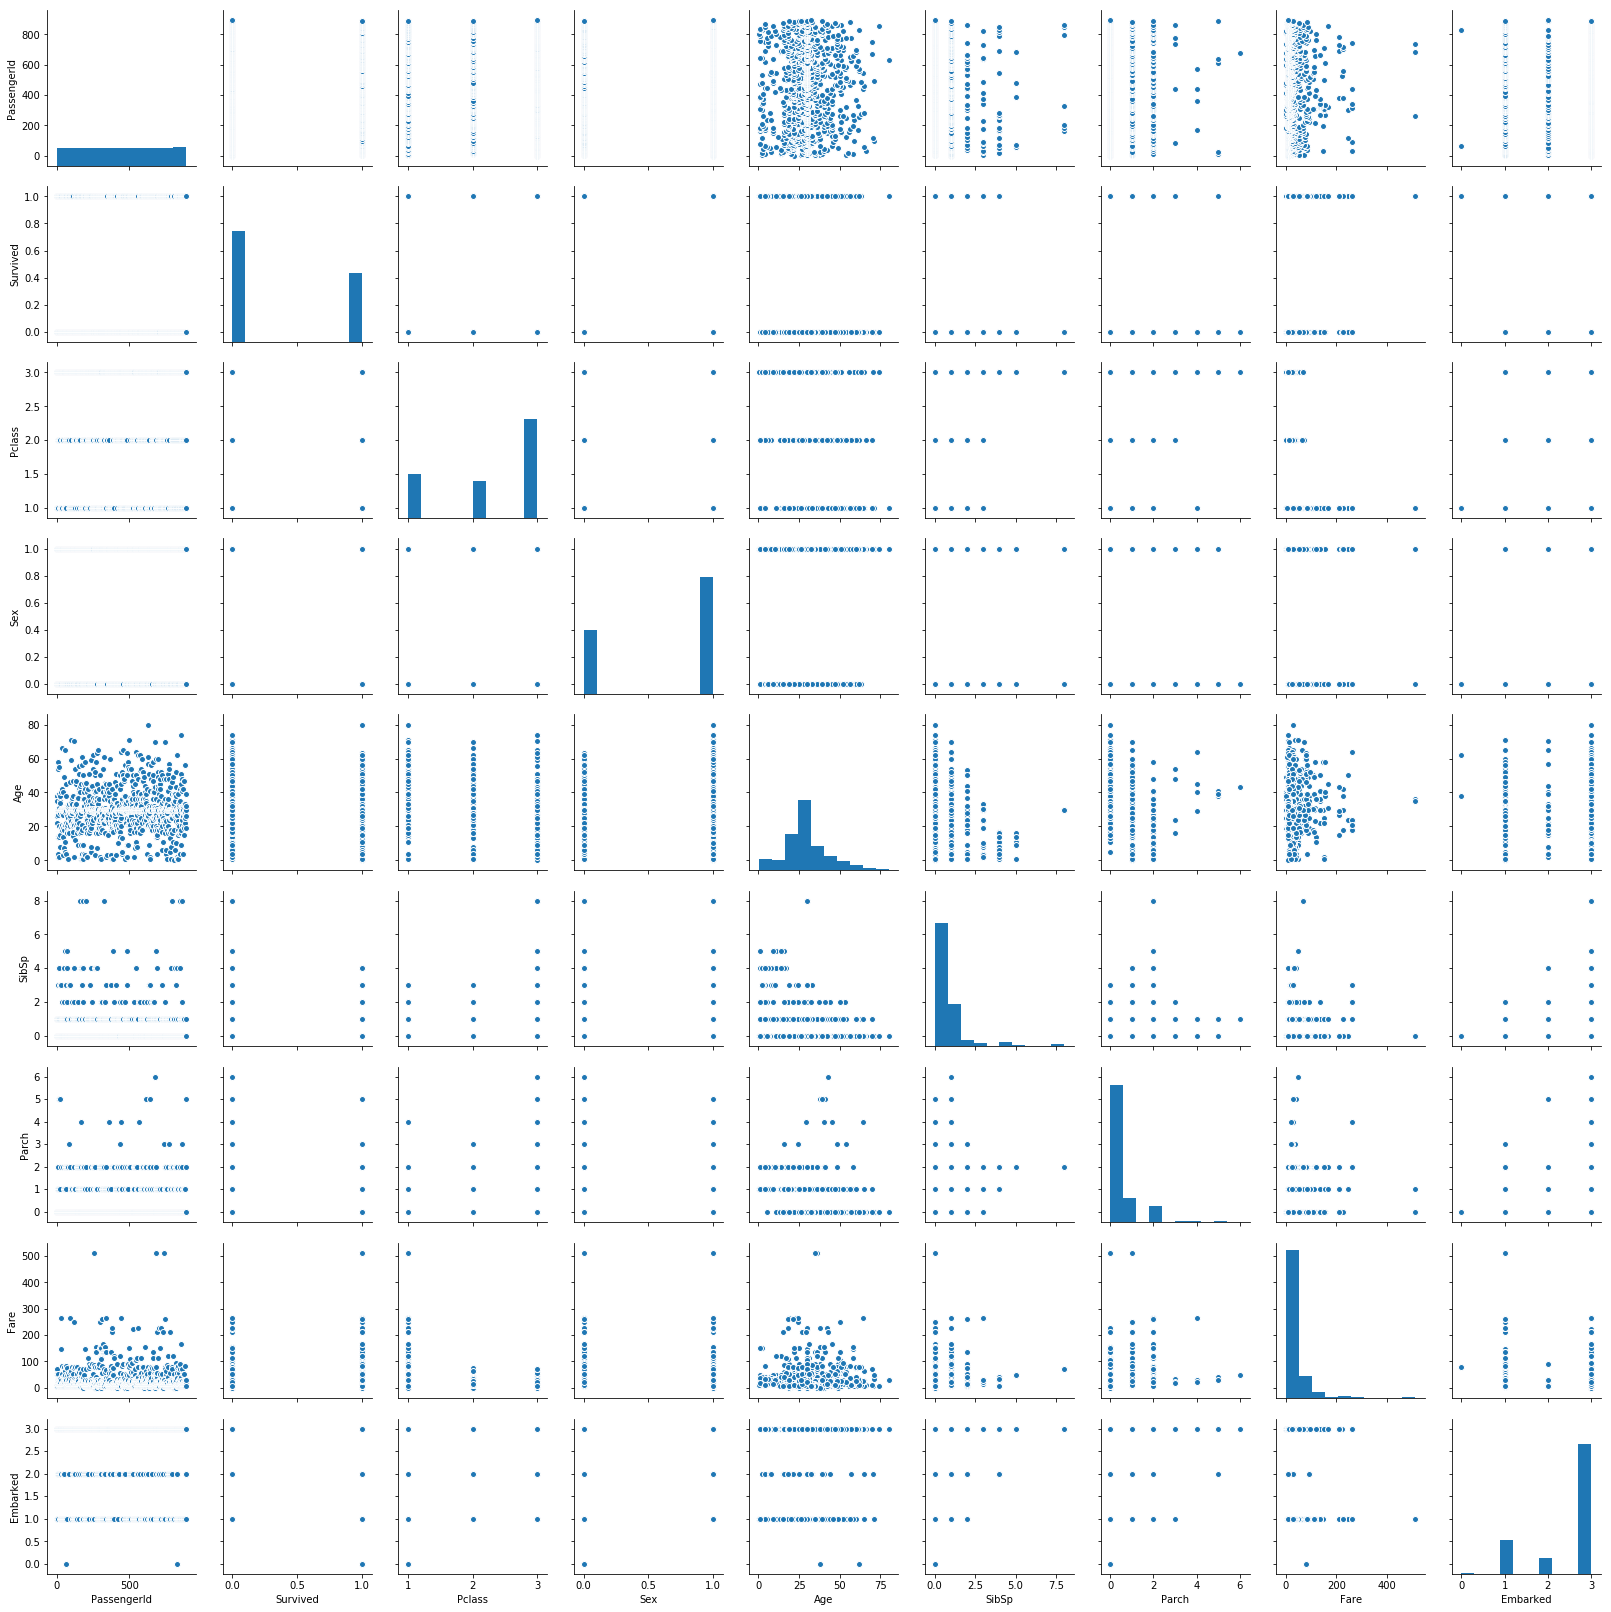

In [6]:
# Initial data exploration
import seaborn as sns

# Pair plot
sns.pairplot(featuresPlot)

# Correlation matrix
featuresPlot.corr(method='pearson')

We are going to split our data so that it's 80% training data and 20% testing.
We are going to use forward feature selection to produce our model.  We will add the feature with the highest correlation to survival to the model, check its accuracy, then select the feature with the next highest correlation.  If that one yields a higher success rate, we will keep it in the model, else we will move on the next feature.
- This does not take into account how the relationship amongst different features may affect information gain, but we can optimize for that after an initial pass with the model.
- We are going to use the ROC and general accuracy metrics (????)


In [10]:
# Feature selection
# Remove features we believe are not necessary at all -- show a correlation???
from sklearn.model_selection import train_test_split

# We are also going to drop the PassengerId attribute, its correlation is only -0.005007 to the Survived feature
data = featuresPlot.copy()
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(["Survived", "PassengerId"], axis=1),
    data.loc[:, "Survived"],
    test_size=0.2,
)

# highest absolute value of correlation with survived is PClass at -0.338481
selectedFeatures = pd.DataFrame({})



